# Proyecto final de la asignatura Minería de datos y el paradigma Big Data - curso 2022/23

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Rutas

In [2]:
path = './Data/'
file = 'itineraries_clean.csv'

## Limpieza del dataset

In [26]:
finalFile = 'itineraries_clean.csv'

columnsSelected = [ 'legId', 'searchDate', 'flightDate', 'startingAirport',
    'destinationAirport', 'travelDuration',
    'isBasicEconomy', 'totalFare',
    'seatsRemaining', 'totalTravelDistance', 
    'segmentsAirlineName', 'segmentsAirlineCode']

data = pd.read_csv(path + file,usecols=columnsSelected,index_col= None)
print(data)
data.to_csv(path + finalFile,index=False)

                                   legId  searchDate  flightDate  \
0       9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17   
1       98685953630e772a098941b71906592b  2022-04-16  2022-04-17   
2       98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17   
3       969a269d38eae583f455486fa90877b4  2022-04-16  2022-04-17   
4       980370cf27c89b40d2833a1d5afc9751  2022-04-16  2022-04-17   
...                                  ...         ...         ...   
299995  90591f3aeeba1c88e66c64746299b28c  2022-04-17  2022-05-11   
299996  bc251918565f2c1aff1ea039220cfece  2022-04-17  2022-05-11   
299997  b6d15042b341b0845241af77866b97d0  2022-04-17  2022-05-11   
299998  55efe31162876477d2761abd5abb438d  2022-04-17  2022-05-11   
299999  e22ff727fea0f61ba78212ecc49b1992  2022-04-17  2022-05-11   

       startingAirport destinationAirport travelDuration  isBasicEconomy  \
0                  ATL                BOS        PT2H29M           False   
1                  ATL         

## Lectura del dataset

In [3]:
split = lambda x: x.split("||")

columnsSelected = [ 'legId', 'searchDate', 'flightDate', 'startingAirport',
    #'destinationAirport', 'travelDuration',
    'isBasicEconomy', 'totalFare',
    #'seatsRemaining', 'totalTravelDistance', 
    #'segmentsAirlineName', 'segmentsAirlineCode'
    ]

data = pd.read_csv(path + file,decimal='.',usecols=columnsSelected, parse_dates=[1,2],)# converters={'segmentsAirlineName':split, 'segmentsAirlineCode':split})
data[:10]

,legId,searchDate,flightDate,startingAirport,isBasicEconomy,totalFare
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,False,248.6
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,False,248.6
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,False,248.6
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,False,248.6
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,False,248.6
5,79eda9f841e226a1e2121d74211e595c,2022-04-16,2022-04-17,ATL,False,248.6
6,9335fae376c38bb61263281779f469ec,2022-04-16,2022-04-17,ATL,False,251.1
7,3904bf87f2d1daf334f1ae7e3b876028,2022-04-16,2022-04-17,ATL,False,251.1
8,d93988734c44a3c075d9efe373352507,2022-04-16,2022-04-17,ATL,False,251.1
9,562e7d5dd6ecbf1509c0c19711dbdca9,2022-04-16,2022-04-17,ATL,False,251.1


In [8]:
data['segmentsAirlineName'] = data['segmentsAirlineName'].apply(split)

In [5]:
data['searchDate'] = data['searchDate'].dt
data['flightDate'] = data['flightDate'].dt

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
data[:10]

## Dividir datos en meses

In [5]:

enero = data[data['flightDate'].dt.month == 1]
febrero = data[data['flightDate'].dt.month == 2]
marzo = data[data['flightDate'].dt.month == 3]
abril = data[data['flightDate'].dt.month == 4]
mayo = data[data['flightDate'].dt.month == 5]
junio = data[data['flightDate'].dt.month == 6]
julio = data[data['flightDate'].dt.month == 7]
agosto = data[data['flightDate'].dt.month == 8]
septiembre = data[data['flightDate'].dt.month == 9]
octubre  = data[data['flightDate'].dt.month == 10]
noviembre = data[data['flightDate'].dt.month == 11]
diciembre = data[data['flightDate'].dt.month == 12]


KeyboardInterrupt: 

In [ ]:
enero.to_csv(path + "enero.csv",index=False)
febrero.to_csv(path + "febrero.csv",index=False)
marzo.to_csv(path + "marzo.csv",index=False)
abril.to_csv(path + "abril.csv",index=False)
mayo.to_csv(path + "mayo.csv",index=False)
junio.to_csv(path + "junio.csv",index=False)
julio.to_csv(path + "julio.csv",index=False)
agosto.to_csv(path + "agosto.csv",index=False)
septiembre.to_csv(path + "septiembre.csv",index=False)
octubre.to_csv(path + "octubre.csv",index=False)
noviembre.to_csv(path + "noviembre.csv",index=False)
diciembre.to_csv(path + "diciembre.csv",index=False)

## Media de coste de vuelos por mes

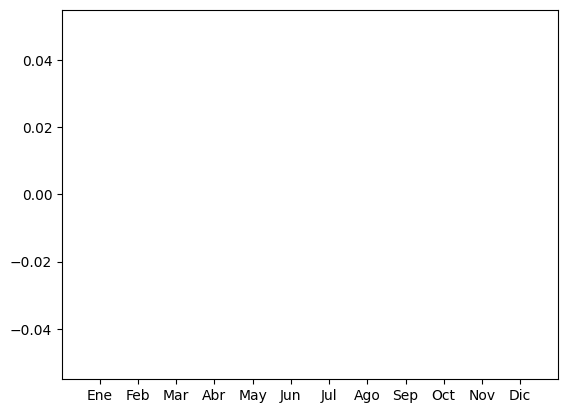

<Figure size 640x480 with 0 Axes>

In [4]:
meses = ['Ene','Feb','Mar','Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov','Dic']
MediaPrecioMes = np.array([
    enero['totalFare'].median(),
    febrero['totalFare'].median(),
    marzo['totalFare'].median(),
    abril['totalFare'].median(),
    mayo['totalFare'].median(),
    junio['totalFare'].median(),
    julio['totalFare'].median(),
    agosto['totalFare'].median(),
    septiembre['totalFare'].median(),
    octubre['totalFare'].median(),
    noviembre['totalFare'].median(),
    diciembre['totalFare'].median()
])
MediaPrecioMes[np.isnan(MediaPrecioMes)] = 0

fig, ax = plt.subplots()
ax.bar(meses, MediaPrecioMes)

plt.show()
plt.savefig('MediaPrecioXMes.png')

## Mismos vuelos en distintas compañias